# Import Libraries

In [ ]:
import stmpy
import stmpy.driftcorr as dfc
import scipy as sp
%pylab inline
pylab.style.use("Thin")

In [ ]:
print(stmpy.__path__)

# Theory behind drift correction algorithm 

## Basics of 2D Fourier transform (FT)

In [ ]:
# generating height map 
Pixels = 1000 #map size, in pixels
Length = 50#map size, in nm
d = 2.5 #lattice constant, in nm

a = linspace(0, Length, Pixels)
x, y = meshgrid(a[:-1], a[:-1])
z = cos(x*2*pi/d)+cos(y*2*pi/d)

z_fft =  stmpy.tools.fft(z, zeroDC=True)
peaks = stmpy.tools.find_extrema(z_fft, n = (5,0), minDist=10)
            
fig, ax = subplots(1,2,figsize=[8,4])
ax[0].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[0].set_ylabel('Distance (nm)')
for i in range(5):
    ax[0].axvline(d*i, linestyle='--', color='k')
    ax[0].axhline(d*i, linestyle='--', color='r')

ax[1].imshow(z_fft,  clim=[0,1e5],cmap=stmpy.cm.gray_r)
ax[1].plot(peaks[:,1], peaks[:,0], 'rx',ms=16)
ax[1].set_xlim(450,550)
ax[1].set_ylim(450,550)

In [ ]:
# generating height map 
Pixels = 1000 #map size, in pixels
Length = 50 #map size, in nm
d = 2.5 #lattice constant, in nm

a = linspace(0, Length, Pixels)
x, y = meshgrid(a[:-1], a[:-1])
z = cos(x*2*pi/d)*cos(y*2*pi/d)

z_fft =  stmpy.tools.fft(z, zeroDC=True)
peaks = stmpy.tools.find_extrema(z_fft, n = (5,0), minDist=10)
            
fig, ax = subplots(1,2,figsize=[8,4])
ax[0].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[0].set_ylabel('Distance (nm)')
ax[0].set_xlim(0,50)
ax[0].set_ylim(0,50)
for i in range(10):
    ax[0].plot(a, -a + i * d  , 'r--')
    ax[0].plot(a, a + (i-5)* d , 'k--')
    
ax[1].imshow(z_fft,  clim=[0,1e5],cmap=stmpy.cm.gray_r)
ax[1].plot(peaks[:,1], peaks[:,0], 'rx',ms=16)
ax[1].set_xlim(450,550)
ax[1].set_ylim(450,550)

## Origin of drift in a map

### How are the maps taken?

<!-- 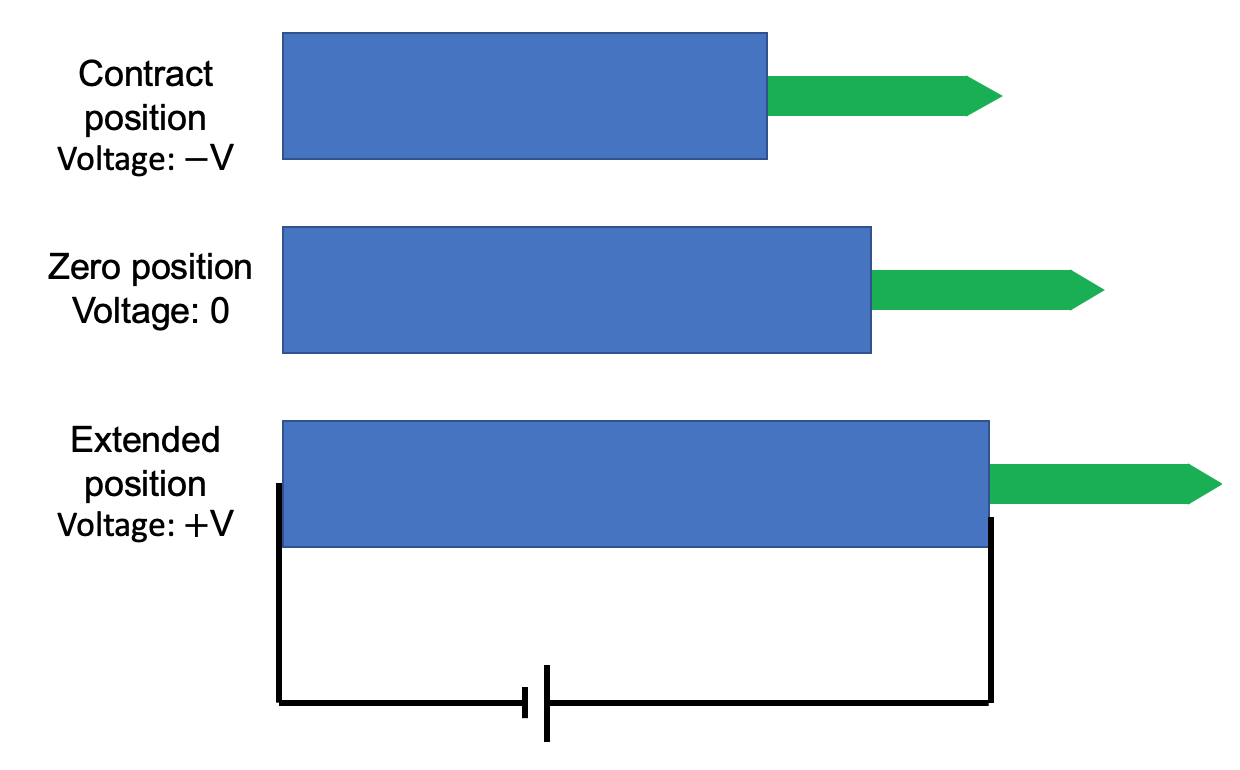 -->

<div>
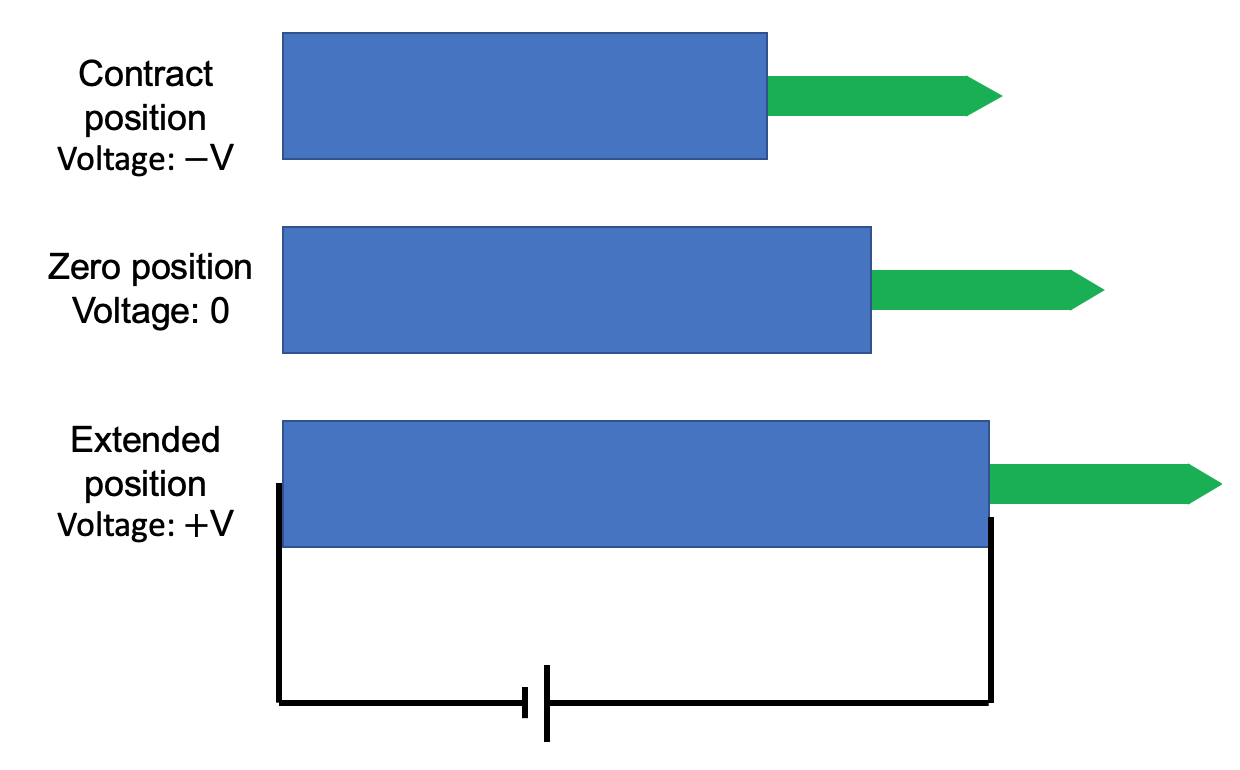
</div>

In [ ]:
# Topography map
num = int(8/0.5)
x_temp = linspace(1, 9, num)
y_temp = ones(num)
fig,ax = subplots(1,3,figsize=[10,3])
ax[0].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[1].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])
ax[2].imshow(z, cmap=stmpy.cm.blue2, extent=[0,Length,0,Length])

ax[0].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[0].plot(x_temp, 0.5*y_temp, 'ro', ms=5)

ax[1].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[1].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[1].plot(x_temp, 0.5*y_temp, 'ro', ms=5)
ax[1].plot(x_temp, 1*y_temp, 'wo', ms=5)

ax[2].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[2].annotate(s='', xy=[10,1.5], xytext=[0,1.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].plot(x_temp, 0.5*y_temp, 'ro', ms=5)
ax[2].plot(x_temp, 1*y_temp, 'wo', ms=5)
ax[2].plot(x_temp, 1.5*y_temp, 'ro', ms=5)

for axis in ax:
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)
    

__<center>Tip movement during a topography scan.</center>__

__Red arrows__: Tip moving forward during a topography map

__White arrows__: Tip moving backward during a topography map

Tip is scanning back and forth at a constant speed, while forward scan and backward scans are stored in different channels.

The span of the scan frame defines the size of the map.

How many points in x-direction and how many lines in y-direction defines number of pixels of the map.

In [ ]:
# Grid map
num = int(8/0.5)
x_temp = linspace(1, 9, num)
y_temp = ones(num)
fig,ax = subplots(1,3,figsize=[10,3])
ax[0].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])
ax[1].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])
ax[2].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])

ax[0].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[0].plot(x_temp, 0.5*y_temp, 'ro', ms=5)

ax[1].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[1].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[1].plot(x_temp, 0.5*y_temp, 'ro', ms=5)

ax[2].annotate(s='', xy=[10,0.5], xytext=[0,0.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].annotate(s='', xy=[0,1], xytext=[10,1],size=20, arrowprops=dict(color='w', arrowstyle='->'))
ax[2].annotate(s='', xy=[10,1.5], xytext=[0,1.5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[2].plot(x_temp, 0.5*y_temp, 'ro', ms=5)
ax[2].plot(x_temp, 1.5*y_temp, 'ro', ms=5)

for axis in ax:
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)
    

__<center>Tip movement during a grid map.</center>__

__Red arrows__: Tip moving forward during a grid map

__White arrows__: Tip moving backward during a grid map

Tip is moving forward (red arrows) at a much slower speed than moving back (white arrows). Measurements are only taken when the tip is moving forward.


### Incorrectly calibrated piezos

<!-- 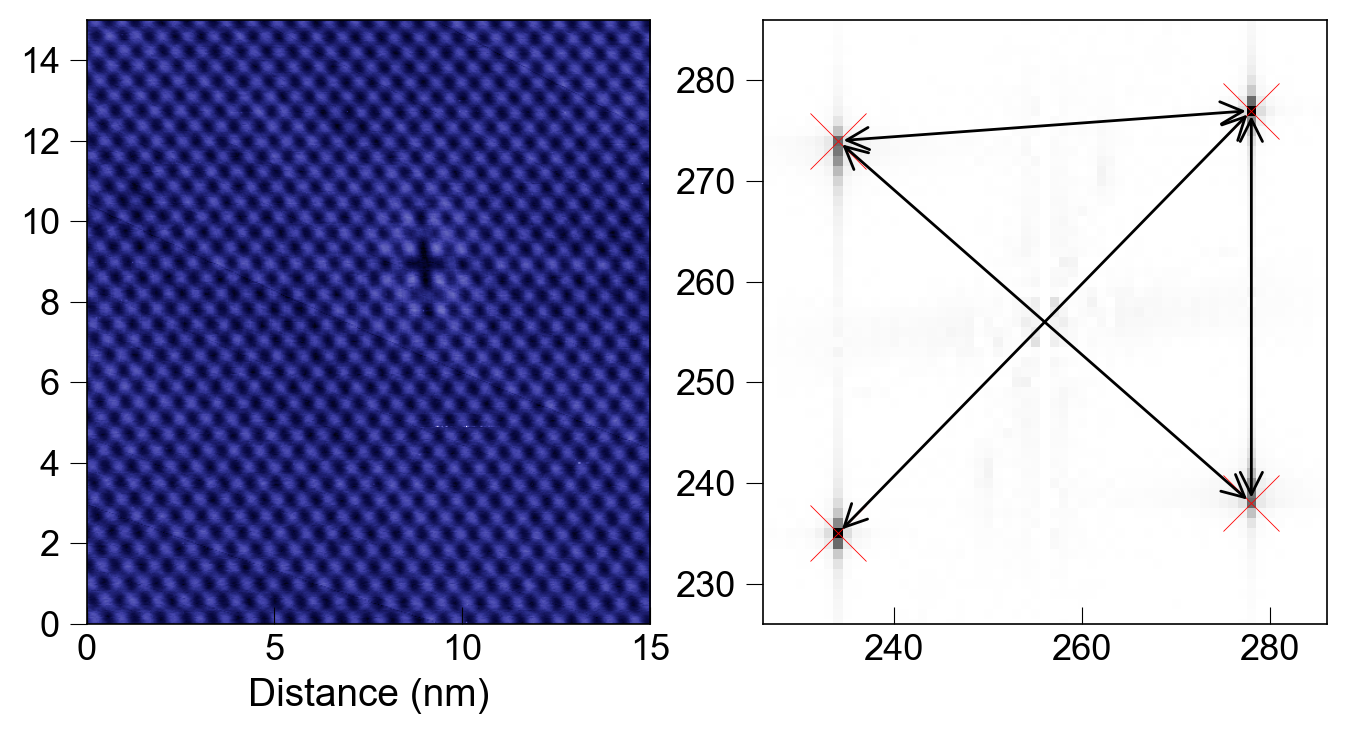 -->

<div>
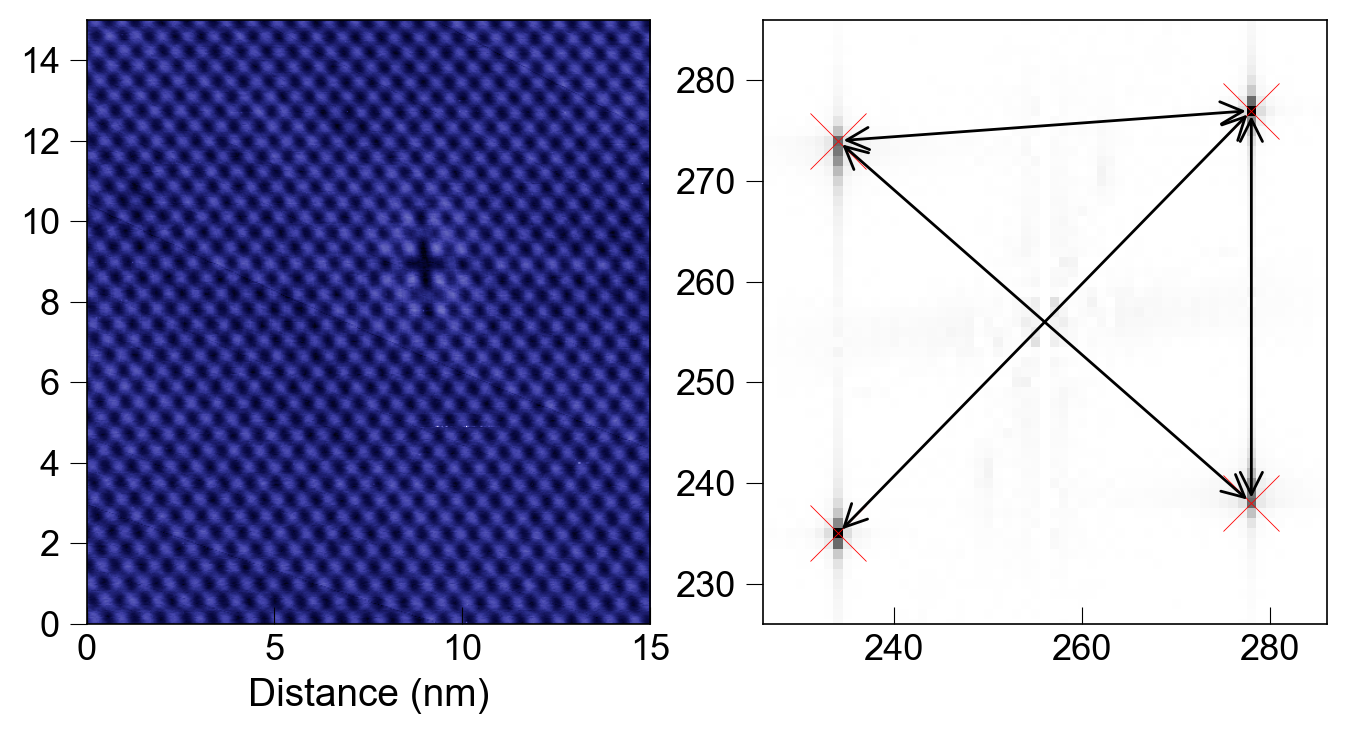
</div>

__<center>An example of incorrectly calibrated piezos.</center>__

The real lattice structure here is a cubic lattice, scanned with an angle of 45$^o$. However, the incorrectly calibrated piezos make the FT pattern a diamond instead of a square.

<!-- 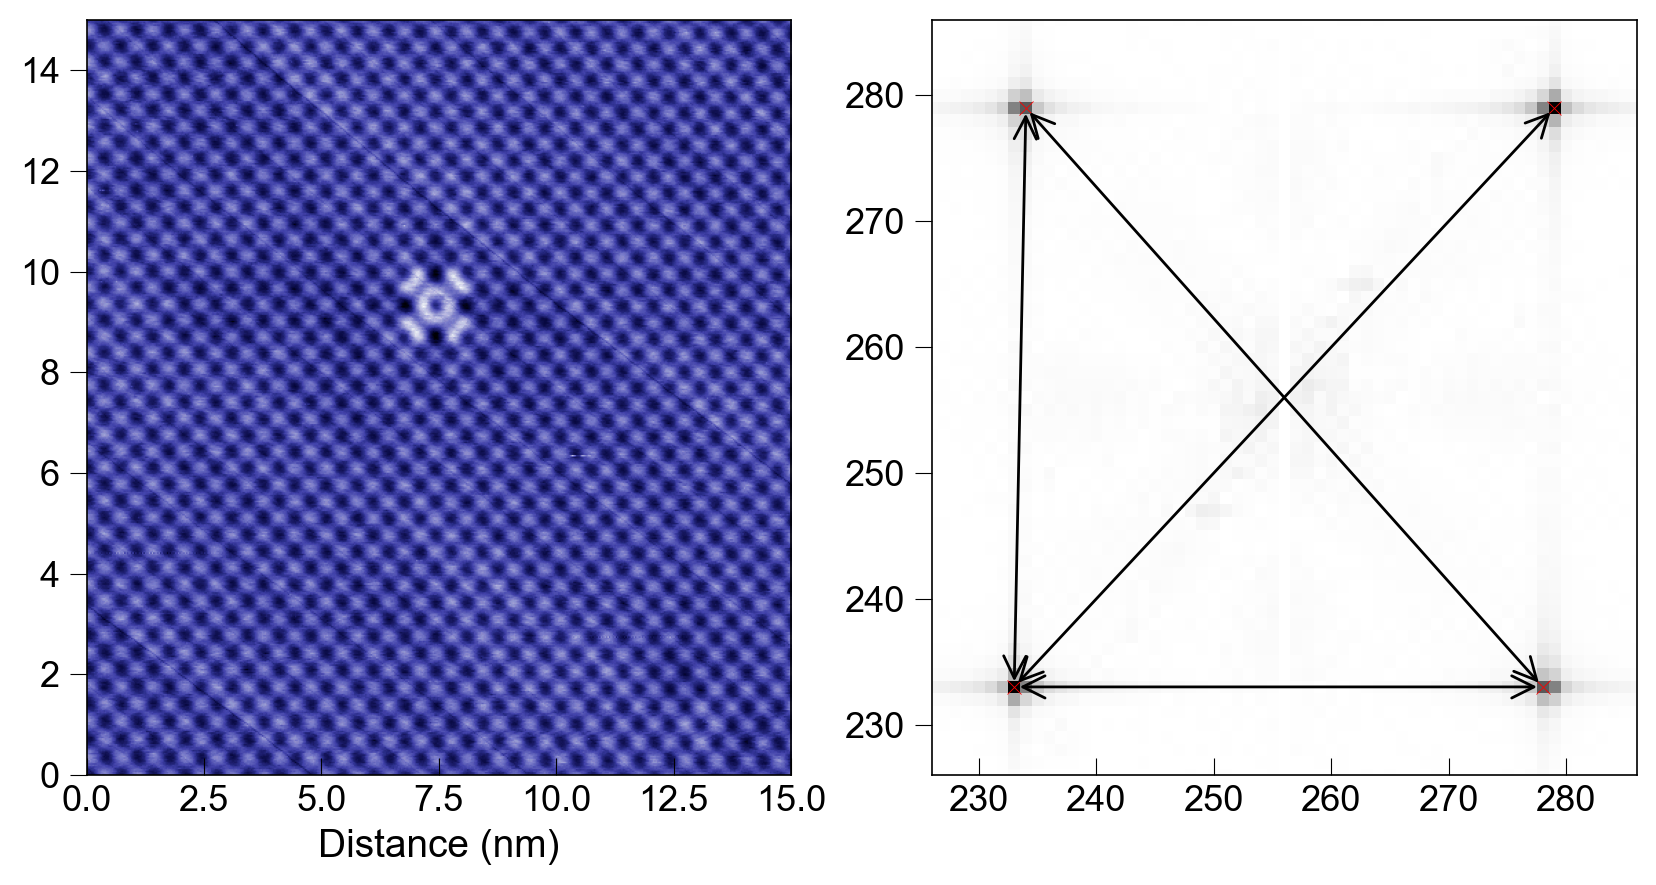 -->

<div>
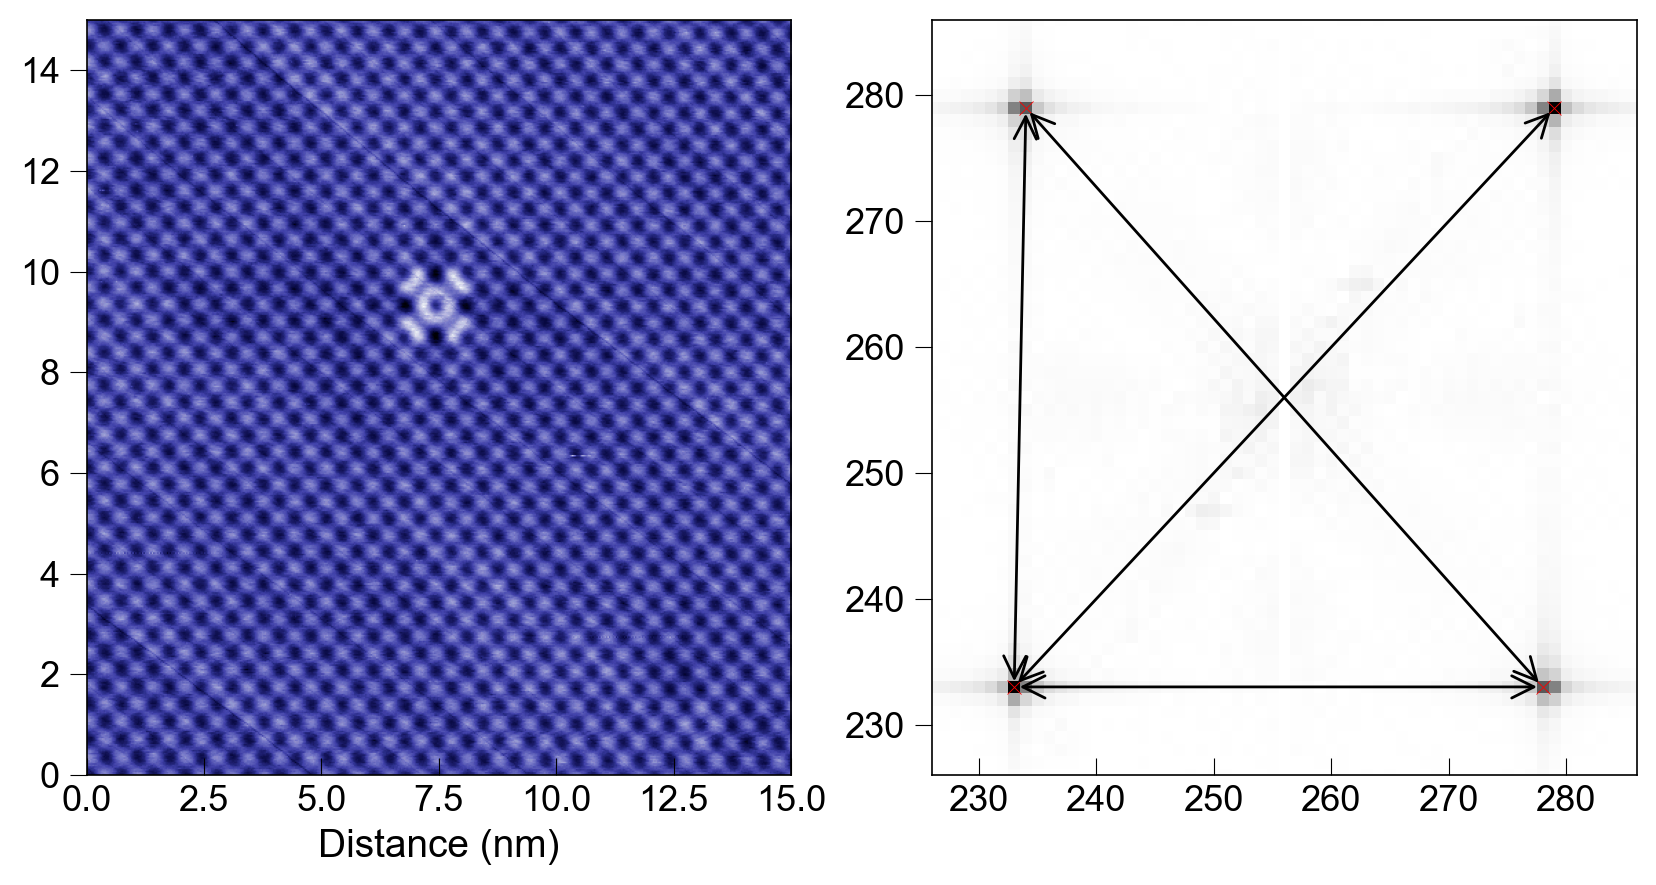
</div>

__<center>An example of correctly calibrated piezos.</center>__


### Piezo relaxation and thermal fluctuation

In [ ]:
# Piezo relaxation
# num = int(8/0.5)
# x_temp = linspace(1, 9, num)
# y_temp = ones(num)
fig,ax = subplots(1,2,figsize=[6,3])
ax[0].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])
ax[1].imshow(z, cmap=stmpy.cm.bone, extent=[0,Length,0,Length])

ax[0].annotate(s='', xy=[5,5], xytext=[0,5],size=20, arrowprops=dict(color='r', arrowstyle='->'))

ax[1].annotate(s='', xy=[5,5], xytext=[0,5],size=20, arrowprops=dict(color='r', arrowstyle='->'))
ax[1].annotate(s='', xy=[6,5], xytext=[5,5],size=20, arrowprops=dict(color='r', arrowstyle='-|>'))

for axis in ax:
    axis.set_xlim(0,10)
    axis.set_ylim(0,10)
    

__<center>Piezo relaxation induced drift</center>__

After we move the tip to the center of map, although we have stopped changing the voltage applied on the piezos, the piezos themselves need time to relax (to reach a still condition).

If we start another scan immediately after moving the tip, then then actually scanning speed will be the scan speed that we set __PLUS__ the piezo relaxation induced drift speed. What's worse is that this relaxation induced drift is not a constant. As a result, the position point that we stored for the data is not precise.





__Thermal drift__

When temperature of the system is chaning, deformation of the sample and scan tubes can impose another drift, known as thermal drift.

To prevent large piezo relaxation induced drift and thermal drift, you can

* Let the tip relax longer time before setting up topo/grid maps.
* Make sure the temperature is not changing a lot during the measurements.
* Use some post-processing analysis to remove the drift


### Summary

Two types of drift source:

* Incorrectly calibrated piezos
* Piezo relaxation drift and thermal drift

where "incorrectly calibrated piezos" will make the FT pattern deformed from the correct shape, and it can be corrected with geometrical transformation,

while "piezo relaxation drift and thermal drift" will induce the leakage of Bragg peaks, since the size of the lattices are different in different region of the map, the Bragg peak will be scattered instead of collaspe into a single pixel

## Math behind drift correction algorithm

### Introduction to lock-in 

* Here is a description of lock-in adapted from the manual of SRS-830 lock-in amplifier:

'Lock-in amplifiers are used to detect and measure __very small AC signals__ - all the way down to a few nanovolts!  Accurate measurements may be made even when the small signal is obscured by noise sources many thousands of times larger.'


* __How do we perform a lock-in measurement?__

Assume that we want to measure the amplitude and phase of an oscillating signal at frequency $\omega_{sig}$,

<ol>
    <li> Generate a lock-in reference with the same frequency as the signal of interest ($\omega_{ref} = \omega_{sig}$) </li>
    <li> Multiply the signal by the lock-in reference </li>
    <li> Apply a low-pass filter to the resulting signal </li>
</ol>

------------------

Let's look at an example on how the lockin works:

$V(t) = V_{sig}cos(\omega_{s}t + \theta_{sig})$


In [ ]:
# Lock-in example - define signal to measure
num = 1000 # number of measurement points, sampling rate = num / length
length = 40 # total duration of measurement
t = linspace(0, length, num=num) # time 
freq = linspace(-pi*num/length, pi*num/length, num=num) # frequency
k1 = 5 # frequency of the signal

v1 = 10.5 # amplitude of the signal

theta1 = pi/3 # initial phase of the signal

y1 = v1*cos(k1*t + theta1) # generate the signal to measure

fig, ax= subplots(1,2,figsize=[8,3])
ax[0].plot(t, y1)
ax[0].set_xlim(0, 10)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Voltage (V)')
ax[1].plot(freq, abs(fft.fftshift(fft.fft(y1))))
ax[1].set_xlim(-12, 12)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FT Amplitude (a.u.)')
tight_layout()


__<center>Time series and frequency domain plots of a signal.</center>__

__Left:__ Time series of the signal to measure (let's assume that we know nothing about it except its frequency, and we'll use lock-in method to find out its amplitude and phase). This signal is defined as $V(t) = V_{sig}cos(\omega_{s}t + \theta_{sig}) = 10.5\times cos(5t + \frac{\pi}{3})$

__Right:__ FT amplitude of the time series on the left. It shows two peaks at $-$5 Hz and 5 Hz, which means the frequency of oscillation is 5 Hz.

-----------------------

The first step is to construct a lock-in reference signal and then multiply it with the signal to measure.

$V = V_{ref}cos(\omega_{r}t + \theta_{ref})$

If we multiply the two signals together:

$
\begin{equation}
    \begin{split}
    V_{PSD} &= V_{ref}V_{sig}cos(\omega_{r}t + \theta_{ref})cos(\omega_{s}t + \theta_{sig})\\
            &= \frac{1}{2}V_{ref}V_{sig}cos[(\omega_{s}+\omega_{r})t + (\theta_{sig}+\theta_{ref})] + \frac{1}{2}V_{ref}V_{sig}cos[(\omega_{s}-\omega_{r})t + (\theta_{sig}-\theta_{ref})]
    \end{split}
\end{equation}
$

Here we have used the trigonometric identity:

$cos(A)cos(B) = \frac{1}{2}(cos(A+B)+cos(A-B))$

In [ ]:
# Lock-in example - multiply the signal with lock-in reference

num = 1000 # number of measurement points, sampling rate = num / length
length = 40 # total duration of measurement
t = linspace(0, length, num=num) # time 
freq = linspace(-pi*num/length, pi*num/length, num=num) # frequency

k1 = 5 # frequency of the signal
k2 = 2 # frequency of the lock-in reference

v1 = 10.5 # amplitude of the signal
v2 = 2 # amplitude of the lock-in reference

theta1 = pi/3 # initial phase of the signal
theta2 = pi/2 # initial phase of the lock-in

y1 = v1*cos(k1*t + theta1) # signal to measure
y2 = v2*cos(k2*t + theta2) # lock-in reference

# Plot functions
fig, ax= subplots(1,2,figsize=[8,3])
ax[0].plot(t, y1)
ax[0].set_xlim(0, 10)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Voltage (V)')
ax[1].plot(freq, abs(fft.fftshift(fft.fft(y1))))
ax[1].annotate(s=r"$\omega_{s}$", xy=[k1, 3000], xytext=[k1+2, 4000], size=18, 
                   arrowprops=dict(arrowstyle='-|>', color='r'))
ax[1].set_xlim(-12, 12)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FT amplitude (a.u.)')
tight_layout()

fig, ax= subplots(1,2,figsize=[8,3])
ax[0].plot(t, y1*y2)
ax[0].set_xlim(0, 10)
ax[0].set_xlabel('Time (t)')
ax[0].set_ylabel('Voltage PSD ($V^2$)')
ax[1].plot(freq, abs(fft.fftshift(fft.fft(y1*y2))))
ax[1].set_xlim(-12, 12)
# ax[1].text(k1-k2+1, 5000, r"$\omega_{s}-\omega_{r}$", fontsize=18)
# ax[1].text(k1+k2+1, 3000, r"$\omega_{s}+\omega_{r}$", fontsize=18)
ax[1].annotate(s=r"$\omega_{s}-\omega_{r}$", xy=[k1-k2, 4000], xytext=[k1-k2+1, 5000], size=18, 
                   arrowprops=dict(arrowstyle='-|>', color='r'))
ax[1].annotate(s=r"$\omega_{s}+\omega_{r}$", xy=[k1+k2, 2000], xytext=[k1+k2+1, 3000], size=18, 
                   arrowprops=dict(arrowstyle='-|>', color='r'))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FT amplitude (a.u.)')
tight_layout()


__<center>Compare the raw signal with the product of raw signal and lock-in reference</center>__

__Upper two:__ Time series and FT of the signal to measure. $V_{sig} = 10.5\times cos(5t + \frac{\pi}{3})$

__Lower two:__ Time series and FT of the product of the signal and lock-in reference. $V_{ref} = 2\times cos(2t + \frac{\pi}{2})$

__As you can see, a single frequency $\omega_{s}$ signal is split into oscillations with two frequencies, $(\omega_{s}+\omega_{r})$ and $(\omega_{s}-\omega_{r})$__

-----------------------

Magic things happen when you choose $(\omega_{r} = \omega_{s})$:

$
\begin{equation}
    V_{PSD} = \frac{1}{2}V_{ref}V_{sig}cos[2\omega_{r}t + (\theta_{ref}+\theta_{sig})] + \frac{1}{2}V_{ref}V_{sig}cos(\theta_{sig}-\theta_{ref})
\end{equation}
$

The second term is a DC term. If we apply a low-pass filter:

$DC[V_{PSD}] = \frac{1}{2}V_{ref}V_{sig}cos(\theta_{sig}-\theta_{ref})$

In [ ]:
# Lock-in example - apply DC filter to the resulting product

num = 10000 # number of measurement points, sampling rate = num / length
length = 400 # total duration of measurement
t = linspace(0, length, num=num) # time 
freq = linspace(-pi*num/length, pi*num/length, num=num) # frequency

k1 = 5 # frequency of the signal
k2 = 4.99 # frequency of the lock-in reference

v1 = 10.5 # amplitude of the signal
v2 = 2 # amplitude of the lock-in reference

theta1 = pi/3 # initial phase of the signal
theta2 = pi/2 # initial phase of the lock-in

y1 = v1*cos(k1*t + theta1) # signal to measure
y2 = v2*cos(k2*t + theta2) # lock-in reference

print("The lock-in result at {} Hz is : {}".format(k2, mean(y1*y2)))
print("The DC component of signal at {} Hz is: {}".format(k1, v1*v2*cos(theta1-theta2)/2))

__Then how to obtain the phase of the signal?__

You can simply rotate the phase of your lock-in reference by $\pi/2$, and then you will get:

$DC[V_{sig}\times V_{ref}cos(\omega_{r}t + \theta_{ref})] = \frac{1}{2}V_{ref}V_{sig}cos(\theta_{sig}-\theta_{ref})$

$DC[V_{sig}\times V_{ref}sin(\omega_{r}t + \theta_{ref})] = \frac{1}{2}V_{ref}V_{sig}sin(\theta_{sig}-\theta_{ref})$

therefore,

$tan(\theta_{sig}-\theta_{ref}) = \frac{DC[V_{sig}\times V_{ref}sin(\omega_{r}t + \theta_{ref})]}{DC[V_{sig}\times V_{ref}cos(\omega_{r}t + \theta_{ref})]} $

then

$\theta_{sig} = \theta_{ref}+ arctan(\frac{DC[V_{sig}\times V_{ref}sin(\omega_{r}t + \theta_{ref})]}{DC[V_{sig}\times V_{ref}cos(\omega_{r}t + \theta_{ref})]}) $

__Summary__

How to perform a lock-in:

<ol>
    <li> Generate a lock-in reference with the same frequency as the signal of interest ($\omega_{ref} = \omega_{sig}$) </li>
    <li> Multiply the signal by the lock-in reference </li>
    <li> Apply a low-pass filter to the resulting signal </li>
</ol>

### Lock-in for dI/dV measurement

Assume that we want to measure a small signal $g(V_0) = \frac{dI}{dV}\bigg|_{V=V_0}$.

Apparently I(V) is a DC measurement and it's too bad that we cannot use lock-in method here. However, if we can come up with a way to introduce oscillation in the "V" and then try to get similar oscillation response in the "I" (which we usually call modulation of the V), we will be able to apply the lock-in method as before.

Basically, we add a small-amplitude oscillating signal on top of the DC voltage $V_0$:

$
\begin{equation}
    \begin{split}
    I(V_0 + V_e cos(\omega t)) &= I(V_0) + V_e cos(\omega t)\times \frac{dI}{dV}\bigg|_{V=V_0} + ... \\
    &= I(V_0) + V_e cos(\omega t)\times g(V_0) + ...
    \end{split}
\end{equation}
$

Let's multiply $cos(\omega t)$ on both sides of the equation:

$
\begin{equation}
    I(V + V_e cos(\omega t))cos(\omega t) = I(V)cos(\omega t) + V_e cos^2(\omega t)\times g(V_0) + ...
\end{equation}
$

Then integrate both sides for a long period T (here the operation of integration works as a low-pass filter), where T is much larger than $1/\omega$:

$
\begin{equation}
    \int_{0}^{T}I(V + V_e cos(\omega t))cos(\omega t)dt = \int_{0}^{T}I(V)cos(\omega t)dt + \int_{0}^{T}V_e cos^2(\omega t)\times g(V_0)dt + ...
\end{equation}
$

If we further assume that $I(V)$ is changing much slower than $cos(\omega t)$, then

$
\begin{equation}
    \begin{split}
    \int_{0}^{T}I(V + V_e cos(\omega t))cos(\omega t)dt &=  \frac{T}{T_0}\times V_e g(V_0)\int_{0}^{T_0} cos^2(\omega t)dt \\
    &= \frac{T}{T_0}\times V_e g(V_0)\int_{0}^{T_0}\frac{1}{2}\{1+cos(2\omega t)\}dt \\
    &= \frac{T}{T_0}\times V_e g(V_0)\times \frac{T_0}{2} \\
    &= V_e g(V_0) \times \frac{T}{2}
    \end{split}
\end{equation}
$

That is,

$
\begin{equation}
       g(V_0) = \frac{2}{V_e T}\int_{0}^{T}I(V + V_e cos(\omega t))cos(\omega t)dt 
\end{equation}
$

### Different low-pass filters

A low-pass filter kills the high-frequency components in a signal while leave low-frequency components intact.


In [ ]:
# Define all the low-pass filter functions

# Moving average filter
def moving_ave(data, mask_size):
    cen = (len(data)-1) // 2
    mask = zeros_like(data)
    mask[cen-mask_size//2:cen+mask_size//2] = 1
    return sp.signal.convolve(data, mask, mode='same') / mask_size
    
def mask_ave(x, cen, width):
    mask = zeros_like(x)
    cen = int(cen)
    width = int(width)
    if cen - width < 0:
        left = 0
    else:
        left = cen - width
    if cen+width > len(x):
        right = len(x)
    else:
        right = cen+width
    mask[left:right] = 1
    return mask

# Moving Gaussian filter
def gaussian_1d(x, p0): 
    amp, cen, sigma, offset = p0
    return amp*exp(-(x-cen)**2/sigma**2) + offset
    
def moving_gauss(data, mask_size):
    
    cen = (len(data)-1) // 2
    x = arange(len(data))
    mask = gaussian_1d(x, p0=[1, cen, mask_size//2, 0]) 
    return sp.signal.convolve(data, mask, mode='same') / mask_size

In [ ]:
# Low-pass filter example - define signal to measure
num = 1000 # number of measurement points, sampling rate = num / length
length = 40 # total duration of measurement
t = linspace(0, length, num=num) # time 
freq = linspace(-pi*num/length, pi*num/length, num=num) # frequency
k1 = 1 # frequency of the signal

v1 = 1 # amplitude of the signal

theta1 = 0 # initial phase of the signal

y1 = v1*sin(k1*t + theta1) 
y2 = v1*sin(2*k1*t + theta1) 
y3 = v1*sin(3*k1*t + theta1) # generate the signal to measure

wavelength = 2*pi/k1

mask = zeros_like(y1)
mask[300:-300] = 1

colors = ['r', 'g', 'b']
data = [y1, y2, y3]
fig, ax= subplots(1,2,figsize=[8,3])

for i in range(3):
    ax[0].plot(t, data[i]+i*2.5, color=colors[i])
    ax[0].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[1].plot(freq, abs(fft.fftshift(fft.fft(data[i]))), color=colors[i])
ax[0].set_xlim(0, 10)
ax[0].set_ylim(-2, 8)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (V)')

ax[1].set_xlim(-12, 12)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FT Amplitude (a.u.)')
ax[1].set_ylim(0, 500)
tight_layout()



In [ ]:
# Low-pass filter example - effect of moving average filter

mask_size = int(0.7*wavelength/40*1e3)
fig, ax= subplots(1,2,figsize=[8,3])

for i in range(3):
    ax[0].plot(t, moving_ave(data[i], mask_size)+i*2.5, color=colors[i])
    ax[0].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[1].plot(freq, abs(fft.fftshift(fft.fft(moving_ave(data[i], mask_size)))), color=colors[i])
ax[0].set_ylim(-2, 8)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (V)')
    
ax[1].set_xlim(-12, 12)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FT Amplitude (a.u.)')
ax[1].set_ylim(0, 500)
tight_layout()



In [ ]:
# Low-pass filter example - example of how moving average works

window_width = int(2/40*1e3) # width of the moving average box
position = 4 # position of the box in unit of sec
index = int(position/40*1e3) # position of the box in unit of pixel

fig,ax=subplots(1,2,figsize=[8,3])
for i in range(3):
    ax[0].plot(t, data[i]+i*2.5, color=colors[i])
    ax[0].plot(t, mask_ave(t, index, window_width)+i*2.5, 'k--')
    ax[0].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[0].axvline(position, linestyle='--', color='k')
    ax[1].plot(t[:index], moving_ave(data[i], mask_size=window_width*2)[:index]+i*2.5, color=colors[i])
    ax[1].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[1].axvline(position, linestyle='--', color='k')

for ix in ax:
    ix.set_xlim(0, 10)
    ix.set_ylim(-2, 8)
    ix.set_xlabel('Time (s)')
    ix.set_ylabel('Voltage (V)')
tight_layout()

__How does the moving average filter work?__

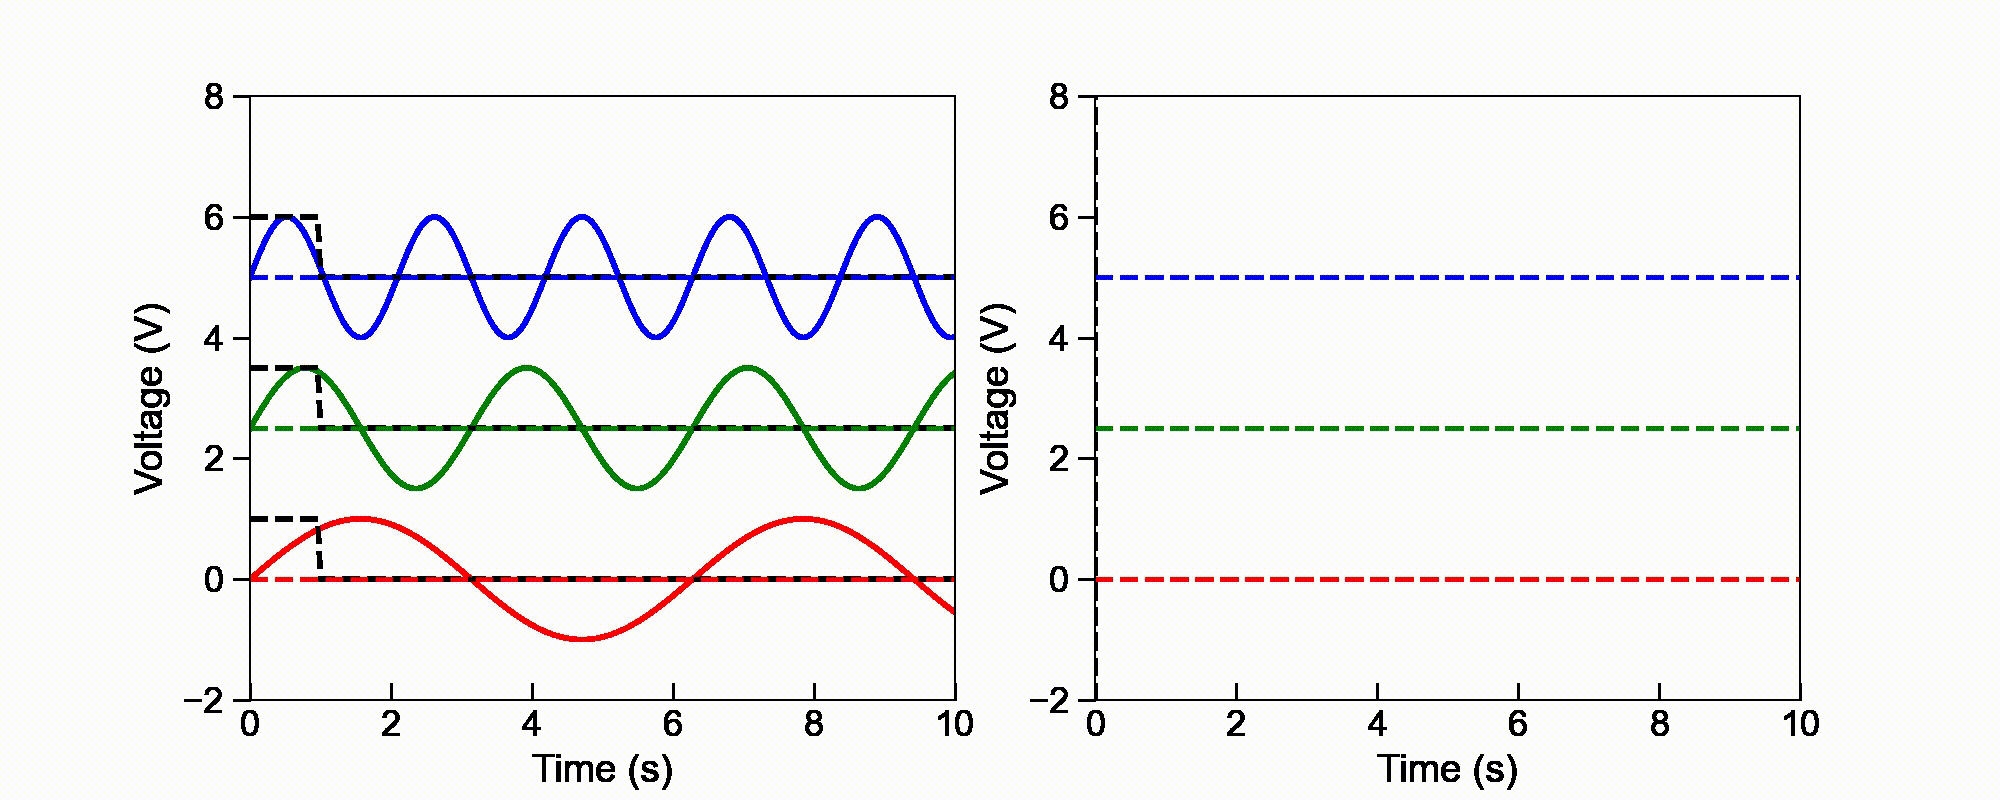

In [ ]:
# Low-pass filter example - cut-off frequency

width = 1*pi
window_width = int(width/2/40*1e3) # width of the moving average box
position = width/2 # position of the box in unit of sec
index = int(position/40*1e3) # position of the box in unit of pixel

cut_off = zeros_like(t)
cut_off[where(t<(2*pi/width))] = 1

fig,ax=subplots(1,2,figsize=[8,3])
for i in range(3):
    ax[0].plot(t, data[i]+i*2.5, color=colors[i])
    ax[0].plot(t, mask_ave(t, index, window_width)+i*2.5, 'k--')
    ax[0].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[1].plot(t, cut_off)
#     ax[1].plot(t[:index], moving_ave(data[i], mask_size=window_width*2)[:index]+i*2.5, color=colors[i])
#     ax[1].axhline(2.5*i, linestyle='--', color=colors[i])

ax[0].set_xlim(0, 10)
ax[0].set_ylim(-2, 8)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_xlim(0, 10)
ax[1].set_ylim(0, 1.5)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel(' Gain of the filter')
tight_layout()


Assume that the width of the moving average box is $L$. 

A wave with its wavelength same as $w$ will have a frequency $\omega = \frac{2\pi}{L}$

We call this frequency as cut-off frequency of this low-pass filter.

In [ ]:
# Low-pass filter example - effect of moving average filter, different mask width

width1 = pi # width of the mnoving average box 1
width2 = 2*pi # width of the mnoving average box 2

fr = linspace(0, 50, num=200)
ratio1 = zeros_like(fr)
ratio2 = zeros_like(fr)


for i in range(len(fr)):
    y = v1*sin(fr[i]*t + theta1) 
    y_out1 = moving_ave(y, int(width1/40*1e3))
    ratio1[i] = mean(absolute(y_out1))/mean(absolute(y))
    y_out2 = moving_ave(y, int(width2/40*1e3))
    ratio2[i] = mean(absolute(y_out2))/mean(absolute(y))
    
figure(figsize=[6,4])
plot(fr, ratio1, color='r', label='width of {:.1f} s'.format(width1))
plot(fr, ratio2, color='b', label='width of {:.1f} s'.format(width2))
xlabel("Frequency (Hz)")
ylabel("Gain of filter")
xscale("log")
yscale("log")
ylim(1e-3, 1e1)
axvline(2*pi/width1, linestyle='--', color='r')
axvline(2*pi/width2, linestyle='--', color='b')
legend()

In [ ]:
# Low-pass filter example - effect of moving Gaussian filter

mask_size = int(0.5*wavelength/40*1e3)
fig, ax= subplots(1,2,figsize=[8,3])

for i in range(3):
    ax[0].plot(t, moving_gauss(data[i], mask_size)+i*2.5, color=colors[i])
    ax[0].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[1].plot(freq, abs(fft.fftshift(fft.fft(moving_gauss(data[i], mask_size)))), color=colors[i])
ax[0].set_ylim(-2, 8)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (V)')

ax[1].set_xlim(-12, 12)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('FT Amplitude (a.u.)')
ax[1].set_ylim(0, 500)
tight_layout()




In [ ]:
# Low-pass filter example - example of how moving average works

window_width = int(1/40*1e3) # width of the moving average box
position = 4 # position of the box in unit of sec
index = int(position/40*1e3) # position of the box in unit of pixel
t0 = arange(len(t))

fig,ax=subplots(1,2,figsize=[8,3])
for i in range(3):
    ax[0].plot(t, data[i]+i*2.5, color=colors[i])
    ax[0].plot(t, gaussian_1d(t0, p0=[1, index, window_width, 0])+i*2.5, 'k--')
    ax[0].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[0].axvline(position, linestyle='--', color='k')
    ax[1].plot(t[:index], moving_gauss(data[i], mask_size=window_width*2)[:index]+i*2.5, color=colors[i])
    ax[1].axhline(2.5*i, linestyle='--', color=colors[i])
    ax[1].axvline(position, linestyle='--', color='k')

for ix in ax:
    ix.set_xlim(0, 10)
    ix.set_ylim(-2, 8)
    ix.set_xlabel('Time (s)')
    ix.set_ylabel('Voltage (V)')
tight_layout()

__How does the moving Gaussian filter work?__

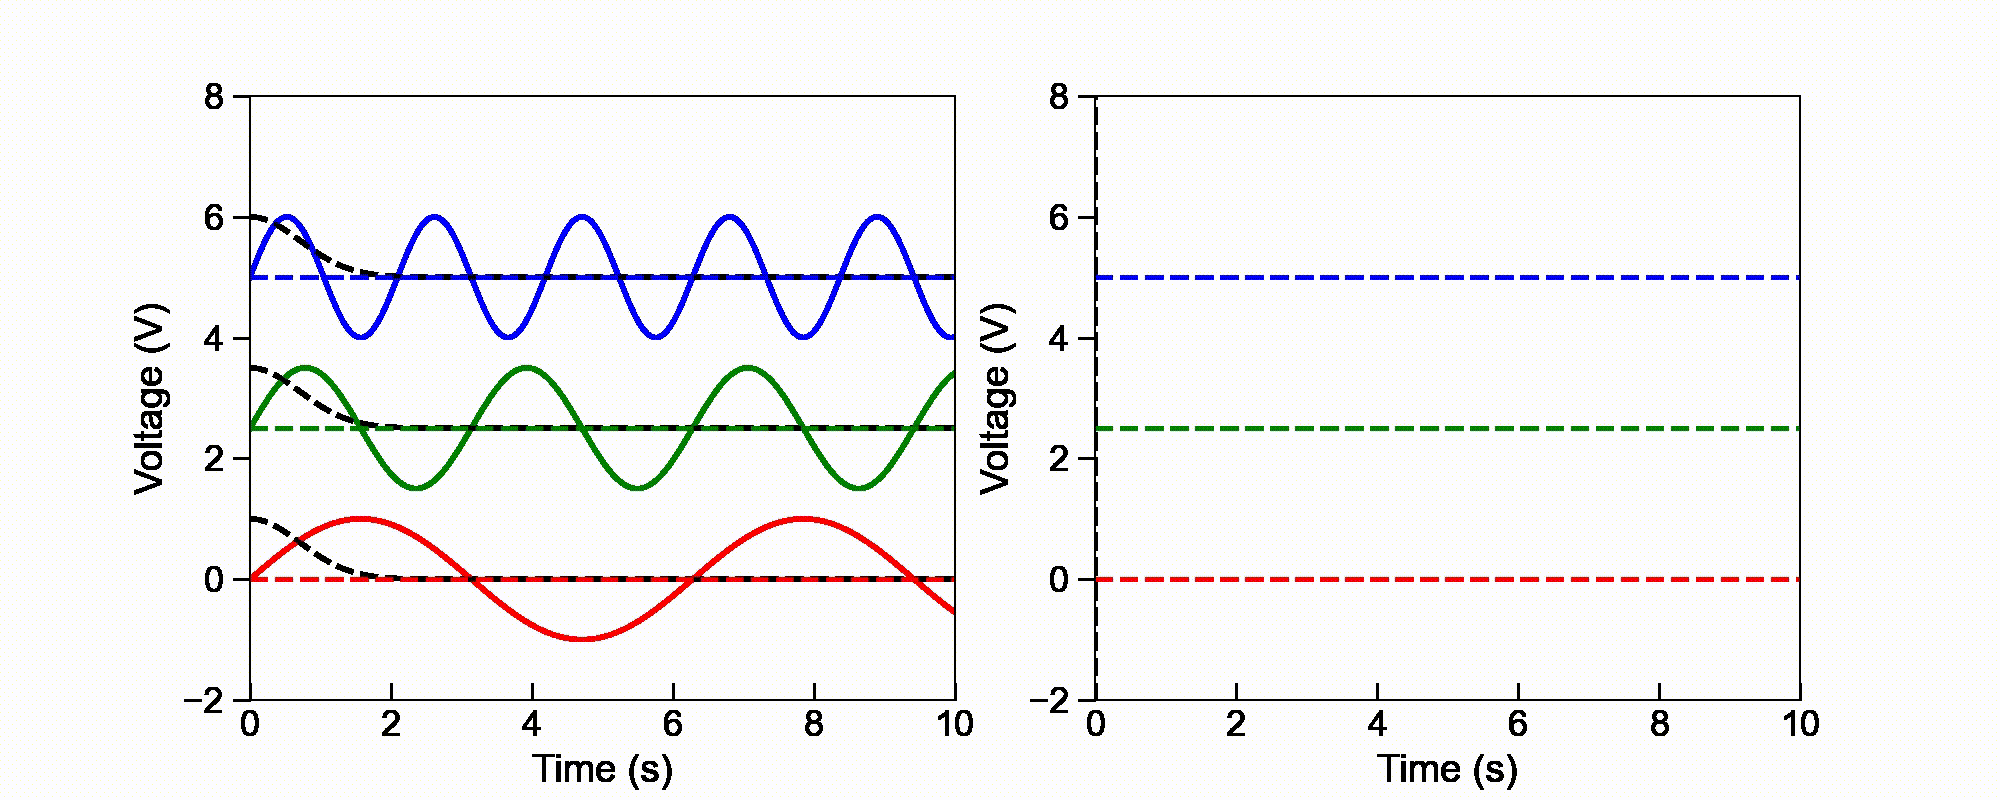

In [ ]:
# Low-pass filter example - effect of moving Gaussian filter, different mask width

width1 = pi/2 # width of the mnoving Gaussian box 1
width2 = 2*pi # width of the mnoving Gaussian box 2

fr = linspace(0, 50, num=200)
ratio1 = zeros_like(fr)
ratio2 = zeros_like(fr)


for i in range(len(fr)):
    y = v1*sin(fr[i]*t + theta1) 
    y_out1 = moving_gauss(y, int(width1/40*1e3))
    ratio1[i] = mean(absolute(y_out1))/mean(absolute(y))
    y_out2 = moving_gauss(y, int(width2/40*1e3))
    ratio2[i] = mean(absolute(y_out2))/mean(absolute(y))

figure(figsize=[6,4])
plot(fr, ratio1, color='r', label='width of {:.1f} s'.format(width1))
plot(fr, ratio2, color='b', label='width of {:.1f} s'.format(width2))
xlabel("Frequency (Hz)")
ylabel("Gain of filter")
xscale("log")
yscale("log")
ylim(1e-3, 1e1)
axvline(2*pi/width1, linestyle='--', color='r')
axvline(2*pi/width2, linestyle='--', color='b')
legend()

### Introduce the drift field

In [ ]:
# Introduce the drift field - define all the parameters for plotting

x = x = linspace(0, 15, num=200) # real space distance
d = 2 # correct lattice constant

# phi = lambda x: pi/10 * x # drifting phase for the drifting lattice
phi = lambda x: log(x+1) # drifting phase for the drifting lattice


atoms = linspace(0, 14, num=8) # correct atom positions
atoms_drift = atoms + phi(atoms)*d/(2*pi) # drifting atom positions

y = cos(2*pi/d * x) # correct atomic corrugation
y_drift = cos(2*pi/d * x - phi(x)) # drifting atomic corrugation


In [ ]:
# Introduce the drift field - plot the correct corrugation

figure(figsize=[6,4])
plot(x, y)
plot(atoms, atoms*0, 'b.', ms=10, mew=2)

xlim(-1, 11)
ylim(-2, 2)
xlabel("Distance (nm)")
ylabel("Height ($\AA$)")

In [ ]:
# Introduce the drift field - plot drifting and correct lattice

figure(figsize=[6,4])
plot(x, y, label='Correct lattice')
plot(atoms, atoms*0, 'b.', ms=12, mew=2)

plot(x, y_drift, 'r', label='Drifting lattice')
plot(atoms_drift, atoms_drift*0, 'ro', ms=6, mew=2)

legend()
xlim(-1, 11)
ylim(-2, 2)
xlabel("Distance (nm)")
ylabel("Height ($\AA$)")

In [ ]:
# Introduce the drift field - define drifting field

figure(figsize=[6,4])
plot(x, y, label='Correct lattice')
plot(atoms, atoms*0, 'b.', ms=12, mew=2)

plot(x, y_drift, 'r', label='Drifting lattice')
plot(atoms_drift, atoms_drift*0, 'ro', ms=6, mew=2)

legend()
xlim(-1, 11)
ylim(-2, 2)
xlabel("Distance (nm)")
ylabel("Height ($\AA$)")

for i in range(len(atoms)):
    gca().annotate(s='', xy=[atoms_drift[i], 1], xytext=[atoms[i], 1], size=10, 
                   arrowprops=dict(arrowstyle='-|>', color='r'))

How can we describe what we have seen in mathematical language?

In the beginning, we have a perfect lattice, which can be represented in the coordinate system $r'$:

$A(r') = cos(k\cdot r')$

where $k$ is the wavevector of the spatial oscillation.

However, in the real measurement, due to the drifting field, we're measuring in the coordinate system $r$:

$A(r) = cos[k\cdot (r + u(r))]$

If we transform from coordinate system $r$ back to $r'$ by the transformation: $r = r - u(r)$, then we can get the perfect lattice back.

In practice, we will use the drifting phase instead of drifting field:

$
\begin{equation}
    \begin{split}
        A(r) &= cos[k\cdot r + k\cdot u(r)] \\
            &= cos[k\cdot r + \theta(r)]
    \end{split}
\end{equation}
$
        
where $\theta(r) = k\cdot u(r)$

In [ ]:
# Introduce the drift field - plot drifting field and the phase map

fig,ax=subplots(1,2,figsize=[9,3])
ax[0].plot(x, phi(x)*d/(2*pi))

ax[0].set_xlim(-1, 11)
ax[0].set_xlabel("Distance (nm)")
ax[0].set_ylabel("Drifting distance (nm)")

ax[1].plot(x, phi(x))

ax[1].set_xlim(-1, 11)
ax[1].set_xlabel("Distance (nm)")
ax[1].set_ylabel("Phase of the drifting (rad)")

The drifting field I generated here is given by:

$\theta(x) = ln(x+1)$

$u(x) = \theta(x)/k = 2\pi\times ln(x+1)/d$

### Extend the concept of drifting field to 2D

A perfect lattice represented by a coordinate system $\vec{r'}$:

$
\begin{equation}
    A(\vec{r'}) = cos(\vec{Q_x}\cdot\vec{r'})+cos(\vec{Q_y}\cdot\vec{r'})
\end{equation}
$

Let's introduce a drifting field $\vec{u}(\vec{r})$, where $\vec{u}(\vec{r})$ is varying much slower than the lattice itself (i.e., the frequency of $\vec{u}(\vec{r})$ is much smaller than $\vec{Q_x}$ and $\vec{Q_y}$):

$\vec{r'} = \vec{r} + \vec{u}(\vec{r})$
where $\vec{r'}$ is the coordinate system without any drift, and $\vec{r}$ is the coordinate system of the actual measurement.

Then the same lattice will become:

$
\begin{equation}
    \begin{split}
    A(\vec{r}) &= cos\{\vec{Q_x}\cdot(\vec{r}+\vec{u}(\vec{r}))\}+cos\{\vec{Q_y}\cdot(\vec{r}+\vec{u}(\vec{r}))\} \\
      &= cos\{(\vec{Q_x}\cdot\vec{r})+(\vec{Q_x}\cdot\vec{u}(\vec{r}))\}+cos\{(\vec{Q_y}\cdot(\vec{r})+(\vec{Q_x}\cdot\vec{u}(\vec{r}))\} \\
      &= cos(\vec{Q_x}\cdot\vec{r} + \phi_x) + cos(\vec{Q_y}\cdot\vec{r} + \phi_y)
    \end{split}
\end{equation}
$

__where $\phi_x(\vec{r}) = \vec{Q_x}\cdot\vec{u}(\vec{r})$, and $\phi_y(\vec{r}) = \vec{Q_y}\cdot\vec{u}(\vec{r})$__


### Spatial lock-in measurement

__How do we perform spatial lock-in?__

In this case, we don't have any temporal signals. Instead, we treat spatial corrugation signals as spatial oscillating signals, and then we can perform similar lock-in tricks.

Assume that we want to measure the amplitude and phase of an spatially oscillating signal at wavevector $Q_{sig}$,

<ol>
    <li> Construct a lock-in reference signal with the same frequency with the signal of interest ($Q_{ref} = Q_{sig}$) </li>
    <li> Multiply the signal by the lock-in reference </li>
    <li> Apply a low-pass filter to the resulting signal </li>
</ol>

Take $A(\vec{r}) = cos\{\vec{Q_x}\cdot\vec{r} + \phi_x\}$ as an example. We will construct two sets of lock-in reference with wavevectors $\vec{Q_x}$ and $\vec{Q_y}$

since $cos(\vec{Q_x}\cdot\vec{r} + \phi_x) = cos(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-sin(\vec{Q_x}\cdot\vec{r})sin(\phi_x)$

$
\begin{equation}
    \begin{cases}
    A_{xx} = A \times cos(\vec{Q_x}\cdot\vec{r}) =  cos^2(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})sin(\phi_x)\\
    A_{xy} = A \times sin(\vec{Q_x}\cdot\vec{r}) = sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-sin^2(\vec{Q_x}\cdot\vec{r})sin(\phi_x)
    \end{cases}
\end{equation}
$

that is,

$
\begin{equation}
    \begin{cases}
    A_{xx} = \frac{1}{2}\{1+cos(2\vec{Q_x}\cdot\vec{r})\}cos(\phi_x)-sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})sin(\phi_x)\\
    A_{xy} = sin(\vec{Q_x}\cdot\vec{r})cos(\vec{Q_x}\cdot\vec{r})cos(\phi_x)-\frac{1}{2}\{1-sin(2\vec{Q_x}\cdot\vec{r}))\}sin(\phi_x)
    \end{cases}
\end{equation}
$

Therefore,

$
\begin{equation}
    \begin{cases}
    F^{-1}(g\cdot F(A_{xx}) = \frac{1}{2}cos(\phi_x)\\
    F^{-1}(g\cdot F(A_{xy}) = -\frac{1}{2}sin(\phi_x)\\
    \end{cases}
\end{equation}
$

where $F(A)$ is the 2D Fourier transform of A, and $F^{-1}(f)$ is the 2D inverse Fourier transform of A.

$g(\vec{r})$ is a 2D Gaussian function with the same size as A, and centered at the center of the map (centered at (0,0) point)

Basically, $F^{-1}(g\cdot F(A_{xx})$ will remove almost all non-DC components from $A_{xx}$

Similarly, we can get:

$
\begin{equation}
    \begin{cases}
    F^{-1}(g\cdot F(A_{xx}) = \frac{1}{2}cos(\phi_x)\\
    F^{-1}(g\cdot F(A_{xy}) = -\frac{1}{2}sin(\phi_x)\\
    F^{-1}(g\cdot F(A_{yx}) = \frac{1}{2}cos(\phi_y)\\
    F^{-1}(g\cdot F(A_{yy}) = -\frac{1}{2}sin(\phi_y)\\
    \end{cases}
\end{equation}
$

Thus, we can use following steps to get the phasemep $\phi_x(\vec{r})$ and $\phi_y(\vec{r})$
* Multiply the map A with one of lattice with correct periodicity (for example, $cos(\vec{Q_x}\cdot\vec{r})$) to get $A_{xx}$
* Take Fourier transform of $A_{xx}$
* Multiply that Fourier transform with a center-located 2D Gaussian function $g(\vec{r})$ to remove all non-DC componnet in the FT
* Take Inverse Fourier transform to get cos or sin of the phasemap
* Reconstruc the phasemap with those sin and cos

Finally, we can have

$
\begin{equation}
    \begin{cases}
    tan(\phi_x) = -\frac{F^{-1}(g\cdot F(A_{xy})}{F^{-1}(g\cdot F(A_{xx})}\\
    tan(\phi_y) = -\frac{F^{-1}(g\cdot F(A_{yy})}{F^{-1}(g\cdot F(A_{yx})}\\
    \end{cases}
\end{equation}
$

At the same time, according to the definition of $\phi_x$ and $\phi_y$, we have

$
\begin{equation}
    \begin{cases}
    \phi_x(\vec{r}) = \vec{Q_x}\cdot\vec{u}(\vec{r})\\
    \phi_y(\vec{r}) = \vec{Q_y}\cdot\vec{u}(\vec{r})\\
    \end{cases}
\end{equation}
$

or,

$
\begin{equation}
    \begin{cases}
    \phi_x(\vec{r}) = Q_{xx}u_x + Q_{xy}u_y\\
    \phi_y(\vec{r}) = Q_{yx}u_x + Q_{yy}u_y\\
    \end{cases}
\end{equation}
$

Solve for $u_x$ and $u_y$, we get:

$
\begin{equation}
    \begin{cases}
    u_x(\vec{r}) = -\frac{Q_{yy}\phi_x-Q_{xy}\phi_y}{Q_{xx}Q_{yy}-Q_{xy}Q_{yx}}\\
    u_y(\vec{r}) = -\frac{Q_{yx}\phi_x-Q_{xx}\phi_y}{Q_{xy}Q_{yx}-Q_{xx}Q_{yy}}\\
    \end{cases}
\end{equation}
$

There are two ways to apply the drift field to the original map:

* "lockin" : Interpolate the $A(\vec{r})$, and then apply the function to the coordinate system $\vec{r'} = \vec{r} + \vec{u}(\vec{r})$
* "convolution" : Make use of the formula $f(x-a) = FT^{-1}\{e^{-2\pi iat}FT(f(t)\}$, that is, $A(\vec{r} + \vec{u}) = FT^{-1}\{e^{2\pi i\vec{u}\cdot\vec{t}}FT(f(\vec{t}))\}$

In [ ]:
# Load the topo
t = stmpy.load("topo.sxm")
A = stmpy.tools.lineSubtract(t.Z, 1)

In [ ]:
dfc.display(A)

In [ ]:
# find the Bragg peaks and related Q-vectors
bp = dfc.findBraggs(A, w=0.1, show=False)

bp1 = dfc.generate_bp(A, bp=bp)
bp1 = dfc.sortBraggs(bp1, s=shape(A))

center = (array([shape(A)[::-1]])-1) // 2
Qc = bp1 - center
print(Qc)

In [ ]:
# display the Q-vectors that we will use in the drift correction
A_ft = stmpy.tools.fft(A, zeroDC=True)
figure(figsize=[4,4])
imshow(A_ft, origin='lower', clim=[0, 1e-9])

for i in range(2):
    gca().annotate(s='', xy=bp1[i], xytext=center[0], size=18, 
                   arrowprops=dict(arrowstyle='-|>', color='r'))
    gca().text(bp1[i,0]-30, bp1[i,1], "$Q_{}$".format(i+1), color='r', size=18)

In [ ]:
# Multiply the map with lock-in reference signals

Q1, Q2, *_ = Qc
s = shape(A)[-1]
t = arange(s)

x, y = meshgrid(t, t)

Axx = A * np.sin(2*pi/s*(Q1[0]*x+Q1[1]*y))
Axy = A * np.cos(2*pi/s*(Q1[0]*x+Q1[1]*y))
Ayx = A * np.sin(2*pi/s*(Q2[0]*x+Q2[1]*y))
Ayy = A * np.cos(2*pi/s*(Q2[0]*x+Q2[1]*y))

In [ ]:
# Display Axx and Ayx
dfc.display(Axx, Ayx)

In [ ]:
# generate the Gaussian masks for the moving-Gaussian low-pass filter
t = shape(A)[-1]
cen = float((t - 1) / 2)
x = arange(t)
y = arange(t)

sigma = 4

Amp = 1/(4*pi*sigma**2)

p0 = [cen, cen, sigma, sigma, Amp, np.pi/2]
G = stmpy.tools.gauss2d(x, y, p=p0, symmetric=True)

imshow(G, origin='lower', aspect=1)
colorbar()

In [ ]:
# apply the moving Gaussian low-pass filter

Axxf = sp.signal.fftconvolve(Axx, G, mode='same',)
Axyf = sp.signal.fftconvolve(Axy, G, mode='same',)
Ayxf = sp.signal.fftconvolve(Ayx, G, mode='same',)
Ayyf = sp.signal.fftconvolve(Ayy, G, mode='same',)


In [ ]:
# get the phase from the lock-in measurement
thetax = np.arctan2(Axxf, Axyf)
thetay = np.arctan2(Ayxf, Ayyf)

In [ ]:
# let's take a look at the phasemap
fig,ax=subplots(1,2,figsize=[10,4])
ax[0].imshow(thetax, origin='lower', aspect=1)
ax[0].axvline(128, linestyle='--', color='r')
ax[1].plot(thetax[:,128])
ax[1].set_xlabel('Distance (pixel)')
ax[1].set_ylabel('Phase along $Q_x$ direction (rad)')

In [ ]:
# fix the phase slips in the phasemap

thetafx= dfc.fixphaseslip(thetax)
thetafy= dfc.fixphaseslip(thetay)

fig,ax=subplots(1,2,figsize=[10,4])
ax[0].imshow(thetafx, origin='lower', aspect=1)
ax[0].axvline(128, linestyle='--', color='r')
ax[1].plot(thetafx[:,128])
ax[1].set_xlabel('Distance (pixel)')
ax[1].set_ylabel('Phase along $Q_x$ direction (rad)')

In [ ]:
# compute drift field from the phasemap
ux, uy = dfc.driftmap(thetafx, thetafy, Q1=Q1*2*pi/s, Q2=Q2*2*pi/s, method='convolution')

# let's take a look at the phasemap
fig,ax=subplots(1,2,figsize=[11,4])
ax[0].imshow(ux, origin='lower', aspect=1)
ax[0].axvline(128, linestyle='--', color='r')
ax[1].plot(ux[:,128])
ax[1].set_xlabel('Distance (pixel)')
ax[1].set_ylabel('Drifting field along $Q_x$ direction (rad)')

In [ ]:
# apply the drifting field to correct the original map
A_c = dfc.driftcorr(A, ux=-ux, uy=-uy, method='convolution')
A_cnew = dfc.cropedge(A_c, n=5, force_commen=True)
dfc.display(A, A_cnew)

# Functional use of dfc

## Drift correct a topo

In [ ]:
# Load the topo data
t = stmpy.load('topo.sxm')
t.z = stmpy.tools.lineSubtract(t.Z, 1)

In [ ]:
# Find parameters to find Bragg peaks
bp1 = dfc.findBraggs(t.z, w=0.05, show=True)

In [ ]:
# Find parameters to find Bragg peaks
t.z_c, p = dfc.find_drift_parameter(t.z, w=0.1, cut2=[0,7,0,7], sigma=4, show=True, method='convolution')

In [ ]:
print(p.keys())

## Drift correct a LIY map

In [ ]:
# Load the dos map file
d = stmpy.load("testing map.3ds")

In [ ]:
# take a look at the map
d.z = mean(d.LIY, axis=0)
dfc.display(d.z)

In [ ]:
# find best parameters for findBraggs() function
bp1 = dfc.findBraggs(d.z, w=0.05, r=0.1, show=True)

In [ ]:
# find the drifting field from averaged liy
d.z_c, p = dfc.find_drift_parameter(d.z, w=0.05, r=0.1, cut1=7, cut2=5, sigma=12, method='lockin', even_out=True, show=True)

In [ ]:
# apply the drift field correction to the LIY 
d.liy_c = dfc.apply_drift_parameter(d.LIY, p=p)

## Drift correct a hexagonal topo

In [ ]:
# load the topo
t = stmpy.load("HOPG_topo.sxm")
dfc.display(t.Z)

In [ ]:
bp = dfc.findBraggs(t.Z, r=0.1, mask3=[6, pi/6, 10], w=None, show=True)

In [ ]:
t.z_c, p = dfc.find_drift_parameter(t.Z, r=0.1, w=None, mask3=[6, pi/6, 10], 
                                    cut1=20, sigma=12, method='lockin', orient=pi/3, show=True)

# OOD Use of dfc

## Two main functions for drift correction

### obj.find_drift()

```python
object.find_drift(
    A,
    r=0.1,
    w=0.1,
    mask3=None,
    cut1=None,
    cut2=None,
    sigma=10,
    method='convolution',
    even_out=False,
    show=True,
    **kwargs,
)
```

* __A__ : Input file, 2D map to be used to find drifting field

* __r, w, mask3__: Parameters to be used in findBraggs() function. 
        Those three parameters should be the same as what you found with dfc.findBraggs() function
        
* __cut1__: Edge cut parameters before drift correction. e.g., cut1=[10,2,10,2], or cut1 = 5
        If you find the drift on one side of your map is too large to be corrected, you can use cut1 to crop them out before drift correction, and then your drift correction should be better.
        
* __cut2__: Edge cut parameters after drift correction. e.g., cut2=[10,2,10,2], or cut1 = 5
        This parameter will help you crop out bad pixels after drift correction. Also, if this parameter is given, then the output map will be interpolated such that it's commensurate with the lattice.
        
* __sigma__: The width of 2D moving Gaussian mask. 
        For 'convolution' method, smaller sigma gives better drift correction result, while larger sigma gives fewer phaseslips.
        For 'lockin' method, larger sigma gives better drift correction result, while smaller sigma gives fewer phaseslips.
        
* __method__: Choose which method to use for finding phasemap and applying drift field.

* __even_out__: If True, then the drift corrected map will contain even number of full periods of lattice. This is useful for maps containing magnetic structures or other long-wavelength patterns.

* __**kwargs__: key word arguments for findBraggs function

## Three-line codes to drift correc a topo

In [ ]:
# Load the topo data
t = stmpy.load('topo.sxm')
t.z = stmpy.tools.lineSubtract(t.Z, 1)

In [ ]:
# Convert a stmpy object to dfc object
# dfc.getAttrs(t)
dfc.getAttrs(t)

In [ ]:
# Find parameters to find Bragg peaks
dfc.findBraggs(t.z, w=0.1, show=True)

In [ ]:
# Drift correct the topo
t.find_drift(t.z, w=0.1, cut2=[0,7,0,7], sigma=4, show=True, method='convolution')

## Three-line codes to drift correc a dos map

In [ ]:
# Load the dos map file
d = stmpy.load("testing map.3ds")

In [ ]:
# take a look at the map
d.z = mean(d.LIY, axis=0)
dfc.display(d.z)

In [ ]:
# convert the Spy object to dfc object
dfc.getAttrs(d)

In [ ]:
# find best parameters for findBraggs() function
dfc.findBraggs(d.z, w=0.1, show=True)

In [ ]:
# find the drifting field from averaged liy
d.find_drift(d.z, w=0.1, cut1=7, cut2=5, sigma=12, method='lockin', even_out=True, show=True)

In [ ]:
# apply the drifting field to every layer of dos map
d.correct(d.LIY)

In [ ]:
for ix in d.liy_c:
    dfc.display(ix)

In [ ]:
# save the drift-free data into a separate file
data_to_save = stmpy.io.Spy()
data_to_save.en = d.en
data_to_save.LIY = d.LIY
data_to_save.liy_corr = d.liy_corr

stmpy.save(data_to_save, "data_to_save topo.spy")

# To load the data again, simply use:
# d_new = stmpy.load("data_to_save topo.spy")

## Three-line codes to drift correc a hexagonal topo

In [ ]:
# load the topo
t = stmpy.load("HOPG_topo.sxm")
dfc.display(t.Z)

In [ ]:
# convert the 
dfc.getAttrs(t, angle=pi/3, orient=0)

In [ ]:
bp = dfc.findBraggs(t.Z, r=0.1, mask3=[6, pi/6, 10], w=None, show=True)

In [ ]:
t.find_drift(t.Z, r=0.1, w=None, mask3=[6, pi/6, 10], cut1=20, sigma=12, method='lockin', show=True)

In [ ]:
bp = dfc.findBraggs(t.zc, r=0.1, mask3=[6, pi/6, 10], w=None, show=True)

In [ ]:
help(t.find_drift)

In [ ]:
t.zc_new = dfc.cropedge(t.zc, n=20, bp=bp, c1=4, c2=2*sqrt(3), force_commen=True)
dfc.display(t.zc, t.zc_new)

## Drift correct a topograph

In [ ]:
# load the topography file
t = stmpy.load("topo.sxm")
t.z = stmpy.tools.lineSubtract(t.Z, 1, maskon=True)



|Filename | Lattice constant(nm)| Image size (nm) |Number of pixels|Lattice orientation|
|-----    |----------------|------------|---------|----------|
|topo.sxm |0.6485          |50          |256$\times$256|45$^o$|


In [ ]:
t.header

In [ ]:
# create useful attributes for the object
dfc.getAttrs(t, a0=0.6485, size=50, pixels=256, angle=pi/2, orient=pi/4, use_a0=True)

In [ ]:
# Visualize the map before any actions. 
# The optional argument sigma defines the color limit to show the FT of the image
dfc.display(t.z, sigma=3)

In [ ]:
# find the Bragg peaks 
t.bp1 = dfc.findBraggs(t.z, r=0.2, w=0.1, show=True)

In [ ]:
# generate the correct Bragg peaks
t.bp2 = dfc.generate_bp(t.z, bp=t.bp1, obj=t)

In [ ]:
ux, uy, t.zcorr = dfc.local_corr(t.z, obj=t, bp=t.bp2,
                                     sigma=6, method="convolution",show=True)

In [ ]:
dfc.display(t.zcorr, sigma=1)

In [ ]:
bp_x = dfc.findBraggs(t.zcorr, w=0.1, show=True)

In [ ]:
n2 = 10
t.z_new = dfc.cropedge(t.zcorr, n=n2, bp=bp_x, obj=t, update_obj=True,  force_commen=True)
dfc.display(t.z, t.z_new, sigma=1)

## Drift correct a dos map

In [ ]:
# Load the data
d = stmpy.load("testing map.3ds")
d.z = stmpy.tools.lineSubtract(d.Z)

d.liy_topo = stmpy.tools.lineSubtract(mean(d.LIY, axis=0), maskon=True)



|Filename | Lattice constant(nm)| Image size (nm) |Number of pixels|Lattice orientation|
|-----    |----------------|------------|---------|----------|
|testing map.3ds |0.6485          |50          |256$\times$256|45$^o$|



In [ ]:
d.header

In [ ]:
# create useful attributes for the object
dfc.getAttrs(d, a0=0.6485, size=50, pixels=256, angle=pi/2, orient=pi/4, use_a0=True)

In [ ]:
# Visualize the dos map before drift correction
dfc.display(d.z)
dfc.display(d.liy_topo)

In [ ]:
d.bp1 = dfc.findBraggs(d.liy_topo, w=0.1, obj=d, update_obj=True, show=True)

In [ ]:
d.bp2 = dfc.generate_bp(d.liy_topo, bp=d.bp1, obj=d)
dfc.check_bp(d.liy_topo, d.bp2)

In [ ]:
# Correct for the local drift with spatial lockin method
ux, uy, d.liy_topo_corr = dfc.local_corr(d.liy_topo, sigma=8, bp=d.bp2, method='convolution',
                                    show=True, obj=d)

In [ ]:
dfc.display(d.liy_topo_corr)

In [ ]:
d.bpx = dfc.findBraggs(d.liy_topo_corr, obj=d, show=True)

In [ ]:
n2 = 20
liy_corr_new = dfc.cropedge(d.liy_topo_corr, n=n2, bp=d.bpx, force_commen=True, obj=d)
dfc.display(d.liy_topo_corr, liy_corr_new, sigma=2)

In [ ]:
# Apply the drift field to all the layers in the dos map

d.liy_corr = dfc.apply_dfc_3d(d.LIY, ux=ux, uy=uy, matrix=None, bp=d.bpx, 
                              n1=None, n2=n2, method='convolution')

In [ ]:
dfc.display(mean(d.liy_corr, axis=0))

In [ ]:
# save the drift-free data into a separate file
data_to_save = stmpy.io.Spy()
data_to_save.en = d.en
data_to_save.LIY = d.LIY
data_to_save.liy_corr = d.liy_corr

stmpy.save(data_to_save, "data_to_save topo.spy")

# To load the data again, simply use:
# d_new = stmpy.load("data_to_save topo.spy")

# More advanced use of dfc

## Work with non-square lattice

In [ ]:
t = stmpy.load("HOPG_topo.sxm")
t.z = stmpy.tools.lineSubtract(t.Z, 1, maskon=True)

In [ ]:
dfc.display(t.z)

In [ ]:
t.header

In [ ]:
# create useful attributes for the object
dfc.getAttrs(t, a0=0.246, size=20, pixels=512, angle=pi/3, orient=0, use_a0=True)

In [ ]:
t.bp1 = dfc.findBraggs(t.z, r=0.1, min_dist=20, thres=0.5, show=True, obj=t, update_obj=True)

In [ ]:
t.bp2 = dfc.generate_bp(t.z, bp=t.bp1, angle=pi/3, orient=0)
dfc.check_bp(t.z, bp=t.bp2)

In [ ]:
t.m1, t.zgc = dfc.global_corr(t.z, bp=t.bp2, angle=pi/3, orient=0)
dfc.findBraggs(t.zgc, mask3=[6, pi/6, 8], show=True)

In [ ]:
t.bp2 = dfc.generate_bp(t.z, bp=t.bp1, angle=pi/3)
dfc.check_bp(t.z, bp=t.bp2)

In [ ]:
n1 = 20
t.zcrop = dfc.cropedge(t.z, n=n1, obj=t, update_obj=False)

In [ ]:
t.bp1 = dfc.findBraggs(t.zcrop, r=0.2, min_dist=10, mask3=[6, pi/6, 8],
                          thres=0.4, show=True, obj=t, update_obj=True)

In [ ]:
t.bp2 = dfc.generate_bp(t.zcrop, bp=t.bp1, angle=pi/3)
dfc.check_bp(t.zcrop, bp=t.bp2)

In [ ]:
t.m1, t.zgc = dfc.global_corr(t.zcrop, bp=t.bp2, angle=pi/3)

In [ ]:
dfc.display(t.zgc)

In [ ]:
ux, uy, t.zcorr = dfc.local_corr(t.zgc, bp=t.bp2, update_obj=True, 
                                     sigma=20, method="lockin",show=True)

In [ ]:
dfc.display(topo.z, topo.zcorr, sigma=1)

In [ ]:
bp_x = dfc.findBraggs(topo.zcorr, obj=topo, show=True)

In [ ]:
n2 = 20
topo.z_new = dfc.cropedge(topo.zcorr, n=n2, bp=bp_x, obj=topo, update_obj=True,  force_commen=True)
dfc.display(topo.z, topo.z_new, sigma=3)

## Work with rectangular dataset

In [ ]:
# Load the data
d = stmpy.load("testing map.3ds")
d.z = stmpy.tools.lineSubtract(d.Z)[120:,:]


In [ ]:
d.liy = copy(d.LIY)[:,120:,:]
d.liy_topo = stmpy.tools.lineSubtract(mean(d.liy, axis=0), 1)

In [ ]:
dfc.display(d.z, d.liy_topo)

In [ ]:
dfc.getAttrs(d, a0=0.6485, size=[50, 50*(256-120)/256], pixels=[256, 256-120], angle=pi/4, use_a0=True)

In [ ]:
d.bp1 = dfc.findBraggs(d.liy_topo, r=0.4, w=0.1, show=True, obj=d, update_obj=True)

In [ ]:
dfc.check_bp(d.liy_topo, bp=d.bp1)

In [ ]:
d.m1, d.liy_gcorr = dfc.global_corr(d.liy_topo, bp=d.bp1, show=True, obj=d, update_obj=True)

In [ ]:
n1 = [10,6,10,4]
d.liy_crop = dfc.cropedge(d.liy_gcorr, n=n1, obj=d, update_obj=True)
dfc.display(d.liy_crop)

In [ ]:
d.bp2 = dfc.findBraggs(d.liy_crop, show=True, obj=d)
dfc.check_bp(d.liy_crop, d.bp2)

d.bp2_new = dfc.generate_bp(d.liy_crop, qx=[-70,-36], qy=[70,-36], obj=d, update_obj=True)
dfc.check_bp(d.liy_crop, d.bp2_new)

In [ ]:
ux, uy, d.liy_topo_corr = dfc.local_corr(d.liy_crop, bp=d.bp2_new, sigma=6, method='lockin', show=True,
                                   obj=d, update_obj=True)

In [ ]:
dfc.display(d.liy_topo_corr)

In [ ]:
d.bpx = dfc.findBraggs(d.liy_topo_corr, obj=d, show=True)
dfc.check_bp(d.liy_topo_corr, d.bpx)
n2 = [6,6,4,4,]
liy_corr_new = dfc.cropedge(d.liy_topo_corr, n=n2, bp=d.bpx, force_commen=True, obj=d, update_obj=True)
dfc.display(d.liy_topo_corr, liy_corr_new, sigma=2)

In [ ]:
# Apply the drift field to all the layers in the dos map

d.liy_corr = dfc.apply_dfc_3d(d.liy, ux=ux, uy=uy, matrix=d.m1, bp=d.bpx, 
                              n1=n1, n2=n2, method='lockin')

# Practice